### 1.0 Plotting Delinquency rates

In [1]:
import pandas as pd

In [402]:
single_family_data = pd.read_csv('Single Family Mortgages.csv')
commercial_re_data = pd.read_csv('Commercial Real Estate.csv')
business_data = pd.read_csv('Business Loans.csv')
consumer_data = pd.read_csv('Consumer.csv')
credit_cards_data = pd.read_csv('Credit Cards.csv')

input_list = [single_family_data,commercial_re_data,business_data,consumer_data,credit_cards_data]

In [403]:
delinquency_data = input_list[0]

for df in input_list[1:]:
    delinquency_data = pd.merge(delinquency_data,df,on='DATE',how='outer')

In [404]:
dates_index = pd.to_datetime(delinquency_data['DATE'],errors='coerce',format='%Y-%m-%d')

delinquency_data.set_index(dates_index,inplace=True)
delinquency_data.drop(columns='DATE',inplace=True)
delinquency_data.index.name = 'Date'

delinquency_data.sort_index(inplace=True)

In [405]:
delinquency_data

,DRSFRMACBS,DRCRELEXFACBS,DRBLACBS,DRCLACBS,DRCCLACBS
Date,,,,,
1987-01-01,NaN,NaN,6.75,3.35,NaN
1987-04-01,NaN,NaN,6.75,3.28,NaN
1987-07-01,NaN,NaN,6.40,3.29,NaN
1987-10-01,NaN,NaN,6.23,3.31,NaN
1988-01-01,NaN,NaN,5.85,3.27,NaN
...,...,...,...,...,...
2022-07-01,1.85,0.64,1.10,1.93,2.08
2022-10-01,1.78,0.69,1.02,2.07,2.26
2023-01-01,1.74,0.76,0.98,2.22,2.43


In [406]:
headings = {'DRSFRMACBS':'Single Family Mortgages',
            'DRCRELEXFACBS':'CRE Loans',
            'DRBLACBS':'Business Loans',
            'DRCLACBS':'Consumer Loans',
            'DRCCLACBS':'Credit Card Loans'}

delinquency_data.rename(columns=headings,inplace=True)

In [411]:
## Backfill delinquency rates

delinquency_data.bfill(axis=0,inplace=True)

delinquency_data.dropna(inplace=True)

In [414]:
delinquency_data

,Single Family Mortgages,CRE Loans,Business Loans,Consumer Loans,Credit Card Loans
Date,,,,,
1987-01-01,3.09,12.12,6.75,3.35,5.26
1987-04-01,3.09,12.12,6.75,3.28,5.26
1987-07-01,3.09,12.12,6.40,3.29,5.26
1987-10-01,3.09,12.12,6.23,3.31,5.26
1988-01-01,3.09,12.12,5.85,3.27,5.26
...,...,...,...,...,...
2022-07-01,1.85,0.64,1.10,1.93,2.08
2022-10-01,1.78,0.69,1.02,2.07,2.26
2023-01-01,1.74,0.76,0.98,2.22,2.43


In [378]:
loan_categories = delinquency_data.columns

In [379]:
import matplotlib.pyplot as plt

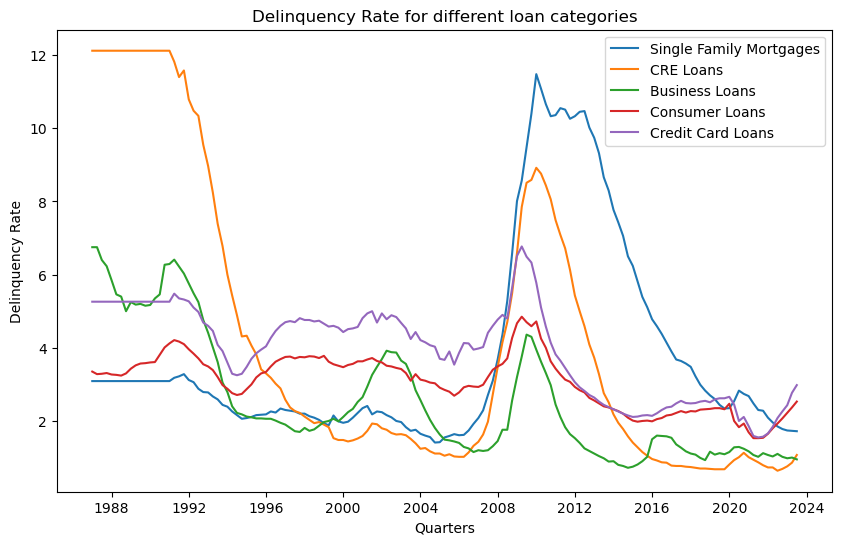

In [453]:
plt.figure(figsize=(10,6))

for category in loan_categories:
    plt.plot(delinquency_data.index, delinquency_data[category], label=category)

plt.xlabel('Quarters')
plt.ylabel('Delinquency Rate')
plt.title('Delinquency Rate for different loan categories')

plt.legend()
plt.show()

### 1.1 Plotting the Correlation Matrix for the different categories of Delinquency Rates

In [183]:
import numpy as np

covariance_matrix = np.cov(delinquency_data.T)
correlation_matrix = np.corrcoef(delinquency_data.T)

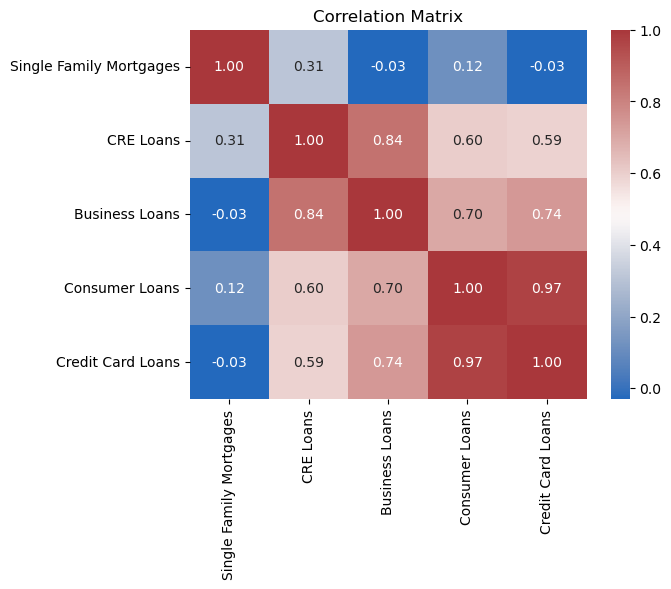

In [184]:
import seaborn as sns

sns.heatmap(correlation_matrix, cmap='vlag', annot=True, fmt=".2f",
            xticklabels=loan_categories, yticklabels=loan_categories)
plt.title('Correlation Matrix')
plt.show()

#### From the correlation matrix, we can say the following about delinquency rates:

1. Single Family Mortgages are uncorrelated with other categories
2. CRE Loans and Business Loans are highly correlated, both of which are moderately correlated with Consumer Loans and Credit Card Loans 
3. Consumer Loans and Credit Card Loans are highly correlated, both of which are moderately correlated with CRE Loans and Busines Loans

### 2.0 Reading Model input data

#### Sources:
1. US Bureau of Labor Statistics:
    <br> a. US Unemployment rate, monthly.<br> <br> 
2. University of Michigan Surveys of Consumers:
    <br> a. Index of Consumer Sentiment, quarterly (Table 1).
    <br> b. Expected Change in Financial Situation in a Year, quarterly (Table 8).
    <br> c. Expected Change in Unemployment During the Next Year, quarterly (Table 30).<br> <br> 
3. US Census Bureau:
    <br> a. US Housing Starts, single unit and multi-unit, quarterly.
    <br> b. US Housing Completions, single unit and multi-unit, quarterly.<br> <br> 
4. Bureau of Economic Analysis, US Department of Commerce:
    <br> a. Household personal savings, quarterly.
    <br> b. Undistributed Corporate profits, quarterly.

##### 2.1.1 Data cleaning and re-formatting - Unemployment rate

In [185]:
unemployment_rate = pd.read_csv('Unemployment rate.csv')

In [189]:
unemployment_rate['Label'] = pd.to_datetime(unemployment_rate['Label'], format='%Y %b')

unemployment_rate.set_index('Label', inplace=True)

In [190]:
qrtrly_unemployment_rate = unemployment_rate.resample('Q').mean()

qrtrly_unemployment_rate.index = qrtrly_unemployment_rate.index + pd.offsets.MonthBegin(1)

In [277]:
qrtrly_unemployment_rate.index.name='Date'

In [293]:
qrtrly_unemployment_rate.columns = ['Unemployment Rate']

In [294]:
qrtrly_unemployment_rate

,Unemployment Rate
Date,
1987-04-01,6.600000
1987-07-01,6.266667
1987-10-01,6.000000
1988-01-01,5.833333
1988-04-01,5.700000
...,...
2023-01-01,3.600000
2023-04-01,3.500000
2023-07-01,3.566667


##### 2.1.2 Data cleaning and re-formatting - Michigan survey of consumers

In [222]:
um_consumer_sentiment = pd.read_csv('Index of Consumer Sentiment.csv', skiprows=1, usecols = [0,1,2])
um_expected_financial = pd.read_csv('Expected Change in Financial Situation.csv', skiprows=1)
um_expected_unemployment = pd.read_csv('Expected Change in Unemployment.csv', skiprows=1)

In [192]:
def clean_umich_data(df):
    df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + (df['Quarter'] * 3).astype(str) + '-30')
    df.set_index('Date',drop=True,inplace=True)
    df.drop(columns=['Quarter', 'Year'],inplace=True)
    df.index = df.index + pd.offsets.MonthBegin(1)
    return df

In [240]:
um_consumer_sentiment = clean_umich_data(um_consumer_sentiment)
um_expected_financial = clean_umich_data(um_expected_financial)
um_expected_unemployment = clean_umich_data(um_expected_unemployment)

In [288]:
um_consumer_sentiment.columns = ['Consumer Sentiment']

um_expected_financial.columns = ['Expected Financial Conditions']

um_expected_unemployment.columns = ['Expected Unemployment']

In [291]:
consumer_survery = pd.concat([um_consumer_sentiment,um_expected_financial,um_expected_unemployment],axis=1)

In [292]:
consumer_survery

,Consumer Sentiment,Expected Financial Conditions,Expected Unemployment
Date,,,
1987-04-01,90.5,126,78
1987-07-01,91.8,123,83
1987-10-01,93.9,125,85
1988-01-01,86.4,122,80
1988-04-01,92.3,131,81
...,...,...,...
2022-10-01,56.1,103,84
2023-01-01,58.8,106,74
2023-04-01,64.6,109,76


##### 2.1.3 Data cleaning and re-formatting - Housing starts and completions

In [295]:
housing_starts = pd.read_csv('Housing Starts.csv')
housing_starts.dropna(inplace=True)
housing_completions = pd.read_csv('Housing Completions.csv')
housing_completions.dropna(inplace=True)

In [296]:
from datetime import datetime

In [297]:
# This function converts dates like '1987Q1' to 1987-04-01
def parse_financial_qe(yyyyqx):
    year, quarter = yyyyqx.split('Q')
    quarter_to_month = {'1': '01', '2': '04', '3': '07', '4': '10'}
    formatted_date = datetime(int(year),int(quarter_to_month[quarter]),1)
    return formatted_date

In [298]:
housing_starts['Period'] = housing_starts['Period'].apply(parse_financial_qe)

housing_starts.set_index('Period',drop=True,inplace=True)

housing_starts.columns = ['Starts, Single-Unit','Starts, Multi-Unit']

In [299]:
housing_completions['Period'] = housing_completions['Period'].apply(parse_financial_qe)

housing_completions.set_index('Period',drop=True,inplace=True)

housing_completions.columns = ['Completes, Single-Unit','Completes, Multi-Unit']

In [300]:
housing = pd.merge(housing_starts,housing_completions,on='Period',how='outer')

In [301]:
housing.index.name='Date'

In [350]:
housing

,"Starts, Single-Unit","Starts, Multi-Unit","Completes, Single-Unit","Completes, Multi-Unit"
Date,,,,
1987-01-01,241,108,240.0,141.0
1987-04-01,346,134,278.0,137.0
1987-07-01,321,127,300.0,138.0
1987-10-01,237,106,305.0,129.0
1988-01-01,220,77,228.0,104.0
...,...,...,...,...
2022-07-01,242,144,261.0,105.0
2022-10-01,193,134,273.0,103.0
2023-01-01,188,127,235.0,98.0


##### 2.1.4 Data cleaning and re-formatting - Personal Savings and Corporate Profits

In [304]:
savings_profits = pd.read_csv('Savings and Profits.csv')

In [306]:
# This function converts dates like '1987 Q1' to 1987-04-01
def parse_financial_qe_2(yyyyqx):
    year, quarter = yyyyqx.split(' Q')
    quarter_to_month = {'1': '01', '2': '04', '3': '07', '4': '10'}
    formatted_date = datetime(int(year),int(quarter_to_month[quarter]),1)
    return formatted_date

In [307]:
savings_profits['Unnamed: 0'] = savings_profits['Unnamed: 0'].apply(parse_financial_qe_2)
savings_profits.columns = ['Date','Personal Savings','Corporate Profits']
savings_profits.set_index('Date',drop=True,inplace=True)

In [351]:
savings_profits

,Personal Savings,Corporate Profits
Date,,
1987-01-01,290.0,75.1
1987-04-01,216.9,104.3
1987-07-01,244.5,115.5
1987-10-01,290.9,117.3
1988-01-01,295.6,118.7
...,...,...
2022-07-01,612.6,1157.9
2022-10-01,622.4,1010.2
2023-01-01,948.2,1040.8


### 2.2 Setting up up the input dataframe

In [341]:
input_data = pd.concat([qrtrly_unemployment_rate,
                        consumer_survery,
                        housing,
                        savings_profits],axis=1)

In [343]:
x_categories = input_data.columns

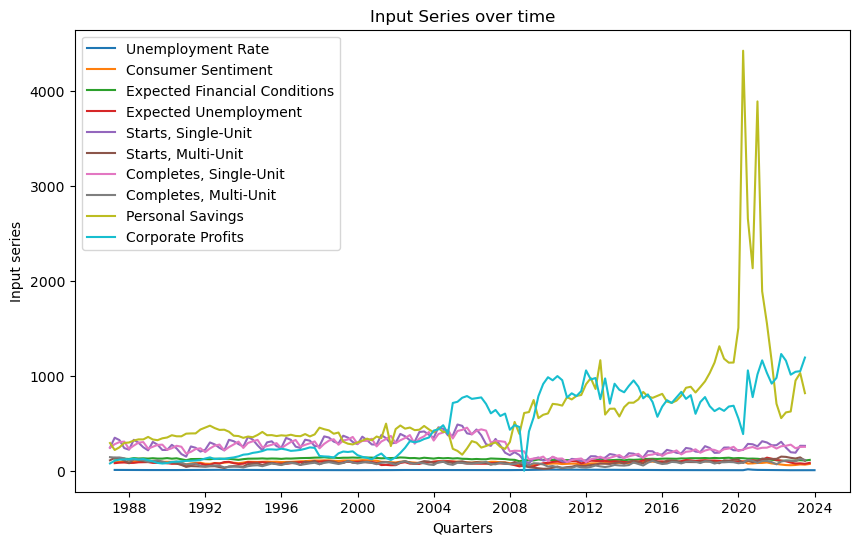

In [344]:
plt.figure(figsize=(10,6))

for cat in x_categories:
    plt.plot(input_data.index, input_data[cat], label=cat)

plt.xlabel('Quarters')
plt.ylabel('Input series')
plt.title('Input Series over time')
plt.legend()
plt.show()

##### 2.2.1 Personal Savings and Corporate profits have extraordinary values between 2020 and 2021

In [345]:
abnormal_event_start = datetime(year=2020,month=1,day=1)
abnormal_event_end = datetime(year=2021,month=12,day=31)

In [346]:
abnormal_event_start, abnormal_event_end

(datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2021, 12, 31, 0, 0))

In [347]:
input_data.loc[(input_data.index >= abnormal_event_start) & (input_data.index <= abnormal_event_end),'Personal Savings'] = np.nan
input_data.loc[(input_data.index >= abnormal_event_start) & (input_data.index <= abnormal_event_end),'Corporate Profits'] = np.nan

input_data['Personal Savings'] = input_data['Personal Savings'].interpolate()
input_data['Corporate Profits'] = input_data['Corporate Profits'].interpolate()

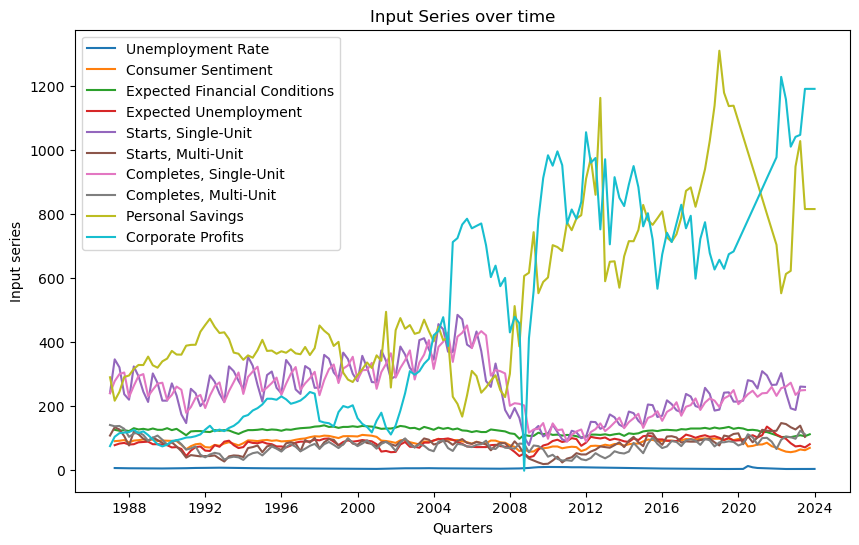

In [349]:
plt.figure(figsize=(10,6))

for cat in x_categories:
    plt.plot(input_data.index, input_data[cat], label=cat)

plt.xlabel('Quarters')
plt.ylabel('Input series')
plt.title('Input Series over time')
plt.legend()
plt.show()

### 2.2 Matching the date index for inputs and outputs, then adding lags

##### 2.2.1 Lagging the input data by 1 quarter

In [431]:
input_data.index = input_data.index + pd.DateOffset(months=3)

input_data.bfill(axis=0,inplace=True)

In [432]:
input_data

,Unemployment Rate,Consumer Sentiment,Expected Financial Conditions,Expected Unemployment,"Starts, Single-Unit","Starts, Multi-Unit","Completes, Single-Unit","Completes, Multi-Unit",Personal Savings,Corporate Profits
Date,,,,,,,,,,
1987-04-01,6.600000,90.5,126.0,78.0,241.0,108.0,240.0,141.0,290.0,75.1
1987-07-01,6.600000,90.5,126.0,78.0,346.0,134.0,278.0,137.0,216.9,104.3
1987-10-01,6.266667,91.8,123.0,83.0,321.0,127.0,300.0,138.0,244.5,115.5
1988-01-01,6.000000,93.9,125.0,85.0,237.0,106.0,305.0,129.0,290.9,117.3
1988-04-01,5.833333,86.4,122.0,80.0,220.0,77.0,228.0,104.0,295.6,118.7
...,...,...,...,...,...,...,...,...,...,...
2023-04-01,3.600000,58.8,106.0,74.0,188.0,127.0,235.0,98.0,948.2,1040.8
2023-07-01,3.500000,64.6,109.0,76.0,261.0,139.0,249.0,123.0,1027.6,1047.1
2023-10-01,3.566667,62.3,106.0,71.0,260.0,104.0,250.0,112.0,815.4,1190.7


##### 2.2.2 Matching the date index

In [433]:
delinquency_data

,Single Family Mortgages,CRE Loans,Business Loans,Consumer Loans,Credit Card Loans
Date,,,,,
1987-01-01,3.09,12.12,6.75,3.35,5.26
1987-04-01,3.09,12.12,6.75,3.28,5.26
1987-07-01,3.09,12.12,6.40,3.29,5.26
1987-10-01,3.09,12.12,6.23,3.31,5.26
1988-01-01,3.09,12.12,5.85,3.27,5.26
...,...,...,...,...,...
2022-07-01,1.85,0.64,1.10,1.93,2.08
2022-10-01,1.78,0.69,1.02,2.07,2.26
2023-01-01,1.74,0.76,0.98,2.22,2.43


In [436]:
full_data = pd.concat([input_data,delinquency_data],axis=1)

full_data.dropna(axis=0,inplace=True)

In [437]:
full_data

,Unemployment Rate,Consumer Sentiment,Expected Financial Conditions,Expected Unemployment,"Starts, Single-Unit","Starts, Multi-Unit","Completes, Single-Unit","Completes, Multi-Unit",Personal Savings,Corporate Profits,Single Family Mortgages,CRE Loans,Business Loans,Consumer Loans,Credit Card Loans
Date,,,,,,,,,,,,,,,
1987-04-01,6.600000,90.5,126.0,78.0,241.0,108.0,240.0,141.0,290.0,75.1,3.09,12.12,6.75,3.28,5.26
1987-07-01,6.600000,90.5,126.0,78.0,346.0,134.0,278.0,137.0,216.9,104.3,3.09,12.12,6.40,3.29,5.26
1987-10-01,6.266667,91.8,123.0,83.0,321.0,127.0,300.0,138.0,244.5,115.5,3.09,12.12,6.23,3.31,5.26
1988-01-01,6.000000,93.9,125.0,85.0,237.0,106.0,305.0,129.0,290.9,117.3,3.09,12.12,5.85,3.27,5.26
1988-04-01,5.833333,86.4,122.0,80.0,220.0,77.0,228.0,104.0,295.6,118.7,3.09,12.12,5.46,3.26,5.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,3.800000,63.1,103.0,104.0,303.0,147.0,256.0,95.0,552.4,1228.1,1.85,0.64,1.10,1.93,2.08
2022-10-01,3.600000,57.8,104.0,98.0,242.0,144.0,261.0,105.0,612.6,1157.9,1.78,0.69,1.02,2.07,2.26
2023-01-01,3.566667,56.1,103.0,84.0,193.0,134.0,273.0,103.0,622.4,1010.2,1.74,0.76,0.98,2.22,2.43


In [568]:
y_1 = full_data['Single Family Mortgages']
y_2 = full_data['Business Loans']
y_3 = full_data['Consumer Loans']
y_data = pd.concat([y_1,y_2,y_3],axis=1)

In [569]:
y_data

,Single Family Mortgages,Business Loans,Consumer Loans
Date,,,
1987-04-01,3.09,6.75,3.28
1987-07-01,3.09,6.40,3.29
1987-10-01,3.09,6.23,3.31
1988-01-01,3.09,5.85,3.27
1988-04-01,3.09,5.46,3.26
...,...,...,...
2022-07-01,1.85,1.10,1.93
2022-10-01,1.78,1.02,2.07
2023-01-01,1.74,0.98,2.22


In [570]:
x_data = full_data.drop(columns=delinquency_data.columns)

In [571]:
x_data

,Unemployment Rate,Consumer Sentiment,Expected Financial Conditions,Expected Unemployment,"Starts, Single-Unit","Starts, Multi-Unit","Completes, Single-Unit","Completes, Multi-Unit",Personal Savings,Corporate Profits
Date,,,,,,,,,,
1987-04-01,6.600000,90.5,126.0,78.0,241.0,108.0,240.0,141.0,290.0,75.1
1987-07-01,6.600000,90.5,126.0,78.0,346.0,134.0,278.0,137.0,216.9,104.3
1987-10-01,6.266667,91.8,123.0,83.0,321.0,127.0,300.0,138.0,244.5,115.5
1988-01-01,6.000000,93.9,125.0,85.0,237.0,106.0,305.0,129.0,290.9,117.3
1988-04-01,5.833333,86.4,122.0,80.0,220.0,77.0,228.0,104.0,295.6,118.7
...,...,...,...,...,...,...,...,...,...,...
2022-07-01,3.800000,63.1,103.0,104.0,303.0,147.0,256.0,95.0,552.4,1228.1
2022-10-01,3.600000,57.8,104.0,98.0,242.0,144.0,261.0,105.0,612.6,1157.9
2023-01-01,3.566667,56.1,103.0,84.0,193.0,134.0,273.0,103.0,622.4,1010.2


### 3.0 Model Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

In [561]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

##### 3.1 Model Training

In [563]:
# Our time series is only 146 rows long

tscv = TimeSeriesSplit(n_splits=2)

In [600]:
models_dict = {}
predictions_dict = {}
actuals_dict = {}

for y_label in y_data.columns:
    y_df = y_data[y_label]
    
    for train_index, test_index in tscv.split(x_data):
        x_train, x_test = x_data.iloc[train_index], x_data.iloc[test_index]
        y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]

        # Standardizing inputs
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)


        # Linear Regression
        lr_model = LinearRegression()
        lr_model.fit(x_train_scaled, y_train)
        y_pred_lr = lr_model.predict(x_test_scaled)
        
        # Lasso Regression
        lasso_model = Lasso(alpha=0.05)  # Adjust alpha as needed
        lasso_model.fit(x_train_scaled, y_train)
        y_pred_lasso = lasso_model.predict(x_test_scaled)

        # Ridge Regression
        ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
        ridge_model.fit(x_train_scaled, y_train)
        y_pred_ridge = ridge_model.predict(x_test_scaled)
        
    # Saving models
    models_dict[f'Linear Model for {y_label}']=lr_model
    models_dict[f'Lasso Model for {y_label}']=lasso_model
    models_dict[f'Ridge Model for {y_label}']=ridge_model
    
    # Saving Predictions
    predictions_dict[f'Linear Model Predictions for {y_label}']=y_pred_lr
    predictions_dict[f'Lasso Model Predictions for {y_label}']=y_pred_lasso
    predictions_dict[f'Ridge Model Predictions for {y_label}']=y_pred_ridge
    
    # Saving Actuals
    actuals_dict[f'Actual Delinquency Rate for {y_label}']=y_test

##### 3.2 Plotting Predictions

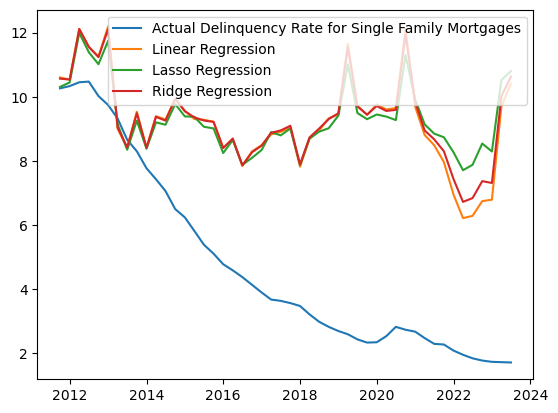

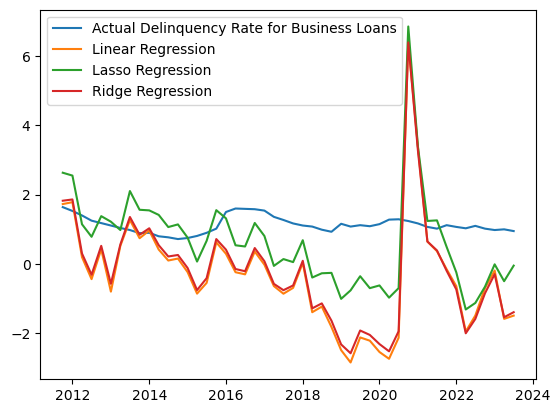

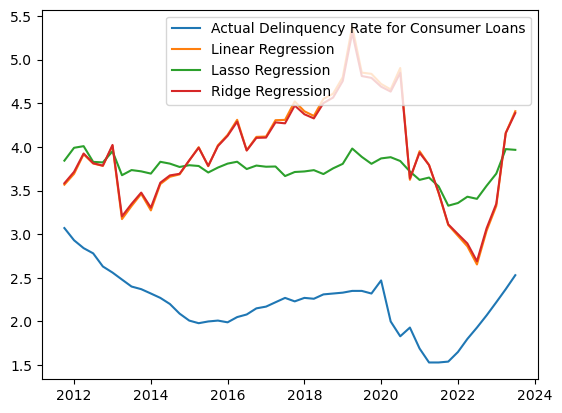

In [601]:
# Plotting predictions

for y_label in y_data.columns:
    pred_linear_model = predictions_dict[f'Linear Model Predictions for {y_label}']
    pred_lasso_model = predictions_dict[f'Lasso Model Predictions for {y_label}']
    pred_ridge_model = predictions_dict[f'Ridge Model Predictions for {y_label}']
    y_actual = actuals_dict[f'Actual Delinquency Rate for {y_label}']
    
    plt.plot(y_actual.index, y_actual, label=f'Actual Delinquency Rate for {y_label}')
    plt.plot(y_actual.index, pred_linear_model, label='Linear Regression')
    plt.plot(y_actual.index, pred_lasso_model, label='Lasso Regression')
    plt.plot(y_actual.index, pred_ridge_model, label='Ridge Regression')
    
    plt.legend()
    plt.show()

In [598]:
print(models_dict)

{'Linear Model for Single Family Mortgages': LinearRegression(), 'Lasso Model for Single Family Mortgages': Lasso(alpha=0.01), 'Ridge Model for Single Family Mortgages': Ridge(), 'Linear Model for Business Loans': LinearRegression(), 'Lasso Model for Business Loans': Lasso(alpha=0.01), 'Ridge Model for Business Loans': Ridge(), 'Linear Model for Consumer Loans': LinearRegression(), 'Lasso Model for Consumer Loans': Lasso(alpha=0.01), 'Ridge Model for Consumer Loans': Ridge()}


##### 3.3 Plotting Model coefficients

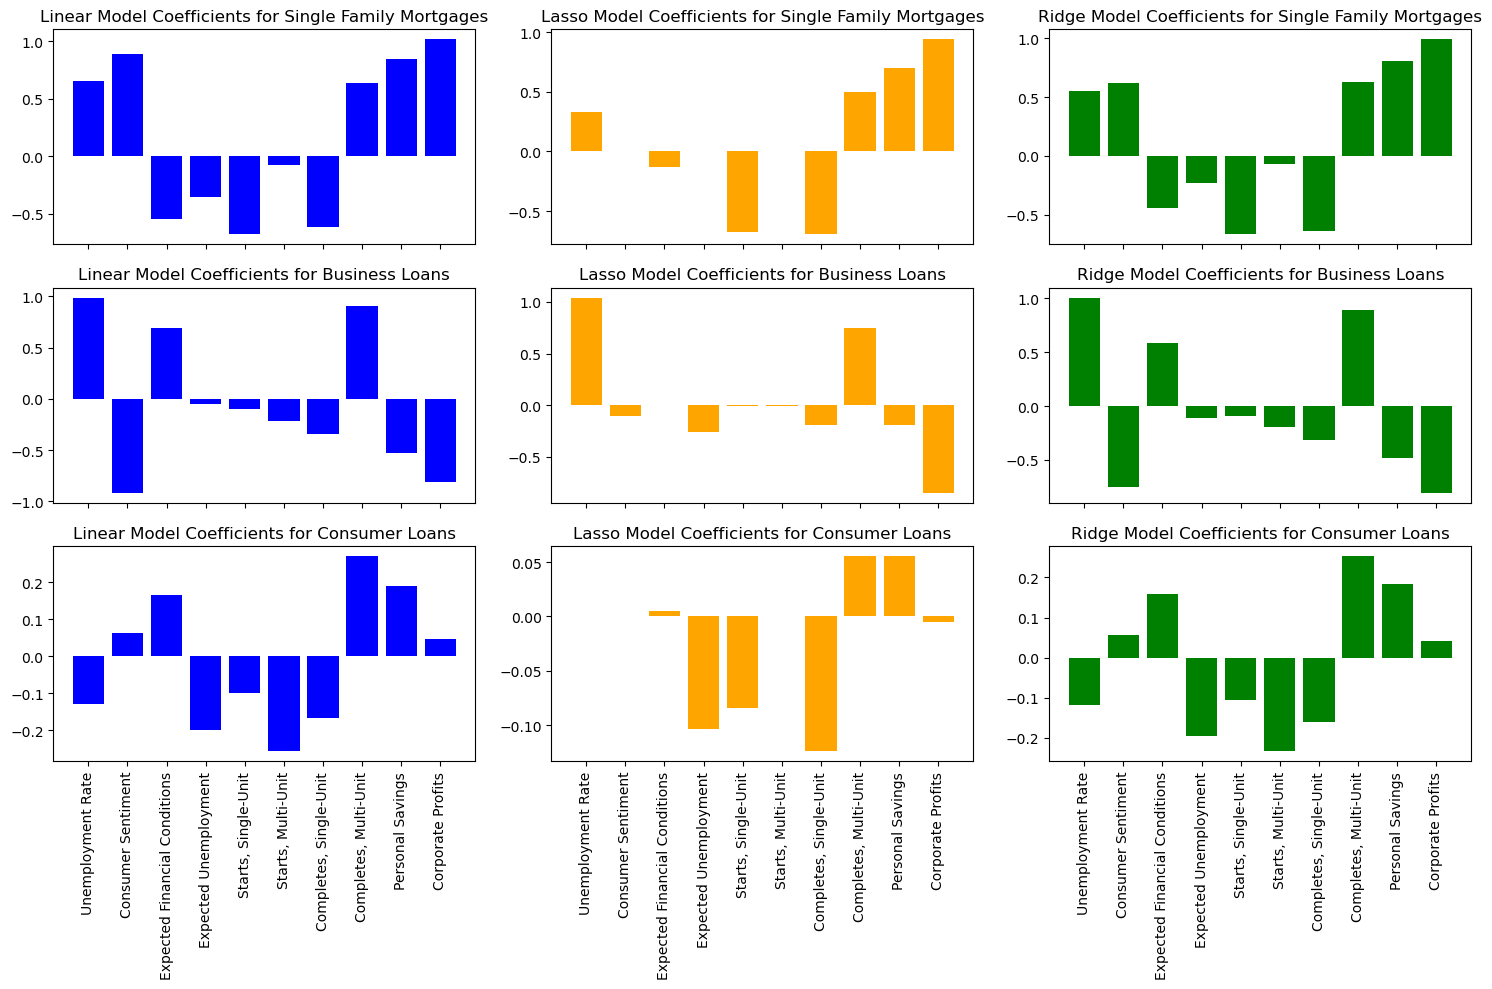

In [602]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i, y_label in enumerate(y_data.columns):
    trained_linear_model = models_dict[f'Linear Model for {y_label}']
    trained_lasso_model = models_dict[f'Lasso Model for {y_label}']
    trained_ridge_model = models_dict[f'Ridge Model for {y_label}']
    linear_betas = trained_linear_model.coef_
    lasso_betas = trained_lasso_model.coef_
    ridge_betas = trained_ridge_model.coef_
    
    axes[i, 0].bar(x_data.columns, linear_betas, color='blue')
    axes[i, 0].set_title(f'Linear Model Coefficients for {y_label}')
    
    axes[i, 1].bar(x_data.columns, lasso_betas, color='orange')
    axes[i, 1].set_title(f'Lasso Model Coefficients for {y_label}')
    
    axes[i, 2].bar(x_data.columns, ridge_betas, color='green')
    axes[i, 2].set_title(f'Ridge Model Coefficients for {y_label}')
    
for j in range(3):
    axes[0, j].tick_params(axis='x', labelbottom=False)
    axes[1, j].tick_params(axis='x', labelbottom=False)
    axes[2, j].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

##### 3.3 Model Performance Metrics

In [624]:
from sklearn.metrics import mean_absolute_error, r2_score

##### 3.3.1. Calculating Metrics

In [625]:
mae_scores = {}
r2_scores = {}

for y_label in y_data.columns:
    pred_linear_model = predictions_dict[f'Linear Model Predictions for {y_label}']
    pred_lasso_model = predictions_dict[f'Lasso Model Predictions for {y_label}']
    pred_ridge_model = predictions_dict[f'Ridge Model Predictions for {y_label}']
    y_actual = actuals_dict[f'Actual Delinquency Rate for {y_label}']
    
    # Calculating MAE for each model
    mae_linear = mean_absolute_error(y_actual, pred_linear_model)
    mae_lasso = mean_absolute_error(y_actual, pred_lasso_model)
    mae_ridge = mean_absolute_error(y_actual, pred_ridge_model)

    # Calculating R-squared for each model
    r2_linear = r2_score(y_actual, pred_linear_model)
    r2_lasso = r2_score(y_actual, pred_lasso_model)
    r2_ridge = r2_score(y_actual, pred_ridge_model)
    
    # Saving to Dict
    mae_scores[f'Linear Model for {y_label}'] = mae_linear
    mae_scores[f'Lasso Model for {y_label}'] = mae_lasso
    mae_scores[f'Ridge Model for {y_label}'] = mae_ridge

    r2_scores[f'Linear Model for {y_label}'] = r2_linear
    r2_scores[f'Lasso Model for {y_label}'] = r2_lasso
    r2_scores[f'Ridge Model for {y_label}'] = r2_ridge

In [626]:
mae_scores

{'Linear Model for Single Family Mortgages': 4.50303548822092,
 'Lasso Model for Single Family Mortgages': 4.590569904585576,
 'Ridge Model for Single Family Mortgages': 4.5791329119577435,
 'Linear Model for Business Loans': 1.775722398910385,
 'Lasso Model for Business Loans': 1.1032629796064113,
 'Ridge Model for Business Loans': 1.7025430579917256,
 'Linear Model for Consumer Loans': 1.7515359357571654,
 'Lasso Model for Consumer Loans': 1.5481705685495342,
 'Ridge Model for Consumer Loans': 1.7451373000891628}

In [627]:
r2_scores

{'Linear Model for Single Family Mortgages': -2.215929993806819,
 'Lasso Model for Single Family Mortgages': -2.378408436702662,
 'Ridge Model for Single Family Mortgages': -2.3216290739967698,
 'Linear Model for Business Loans': -82.71409287414518,
 'Lasso Model for Business Loans': -37.163294705934135,
 'Ridge Model for Business Loans': -76.4008564495454,
 'Linear Model for Consumer Loans': -29.164840755600306,
 'Lasso Model for Consumer Loans': -20.525782871293224,
 'Ridge Model for Consumer Loans': -28.713973860366508}

##### 3.3.2 Plotting Metrics

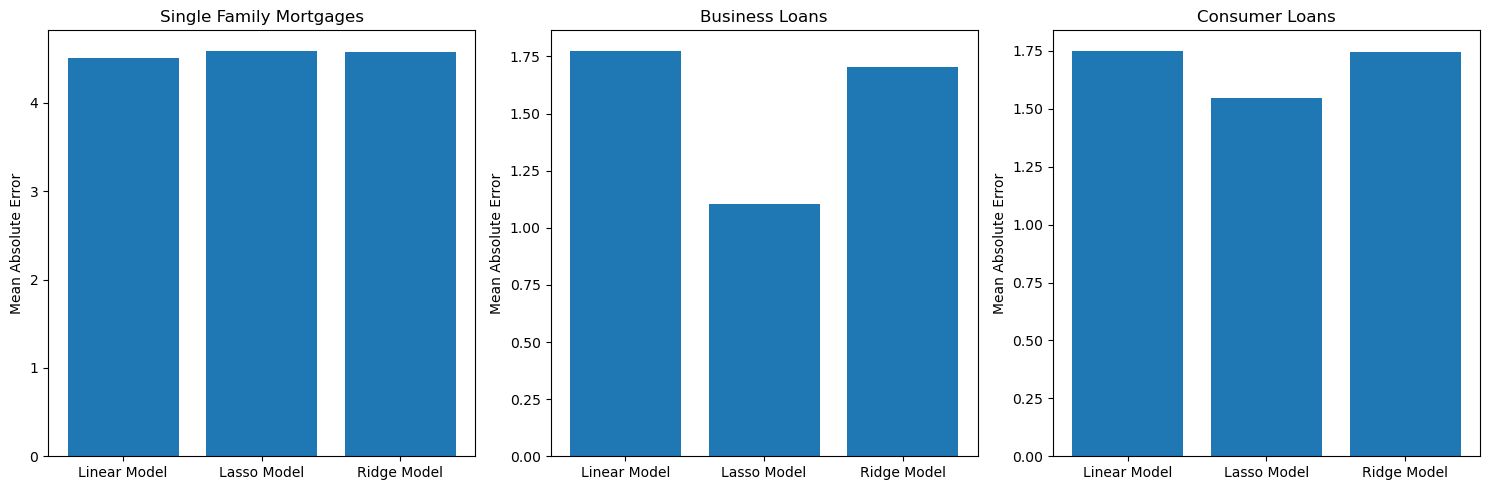

In [631]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, y_label in enumerate(y_data.columns):

    scores = [mae_scores[f'Linear Model for {y_label}'],
              mae_scores[f'Lasso Model for {y_label}'],
              mae_scores[f'Ridge Model for {y_label}']]

    axes[i].bar(['Linear Model', 'Lasso Model', 'Ridge Model'], scores)
    axes[i].set_title(f'{y_label}')
    axes[i].set_ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

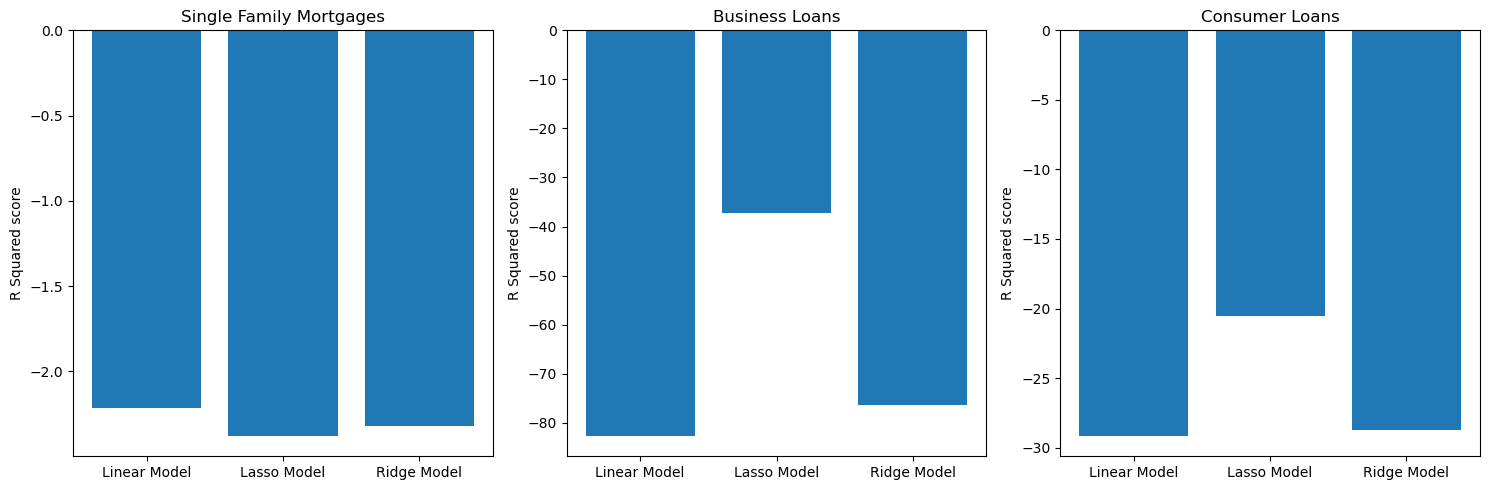

In [633]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, y_label in enumerate(y_data.columns):

    scores = [r2_scores[f'Linear Model for {y_label}'],
              r2_scores[f'Lasso Model for {y_label}'],
              r2_scores[f'Ridge Model for {y_label}']]

    axes[i].bar(['Linear Model', 'Lasso Model', 'Ridge Model'], scores)
    axes[i].set_title(f'{y_label}')
    axes[i].set_ylabel('R Squared score')

plt.tight_layout()
plt.show()